In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from create_labels import *
import os

from dataset_generator import DatasetGenerator

In [2]:
image_type = 'PS-RGB'
img_path_prototype = f'./datasets/train/AOI_11_Rotterdam/{image_type}/SN6_Train_AOI_11_Rotterdam_{image_type}_'
summary = load_summary()
img_ids = list(set(summary['ImageId']))

In [3]:
dg = DatasetGenerator(img_ids, summary, img_path_prototype)
ot = (tf.float32, tf.int64)
os = (tf.TensorShape([256, 256, 3]), tf.TensorShape([68, 68, 1]))
dataset = tf.data.Dataset.from_generator(dg, ot, os).batch(8)

In [4]:
def show(image, label):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
  ax1.imshow(image)
  ax2.imshow(label)

In [5]:
#for image, label in dataset.take(5):
#  show(image, label)

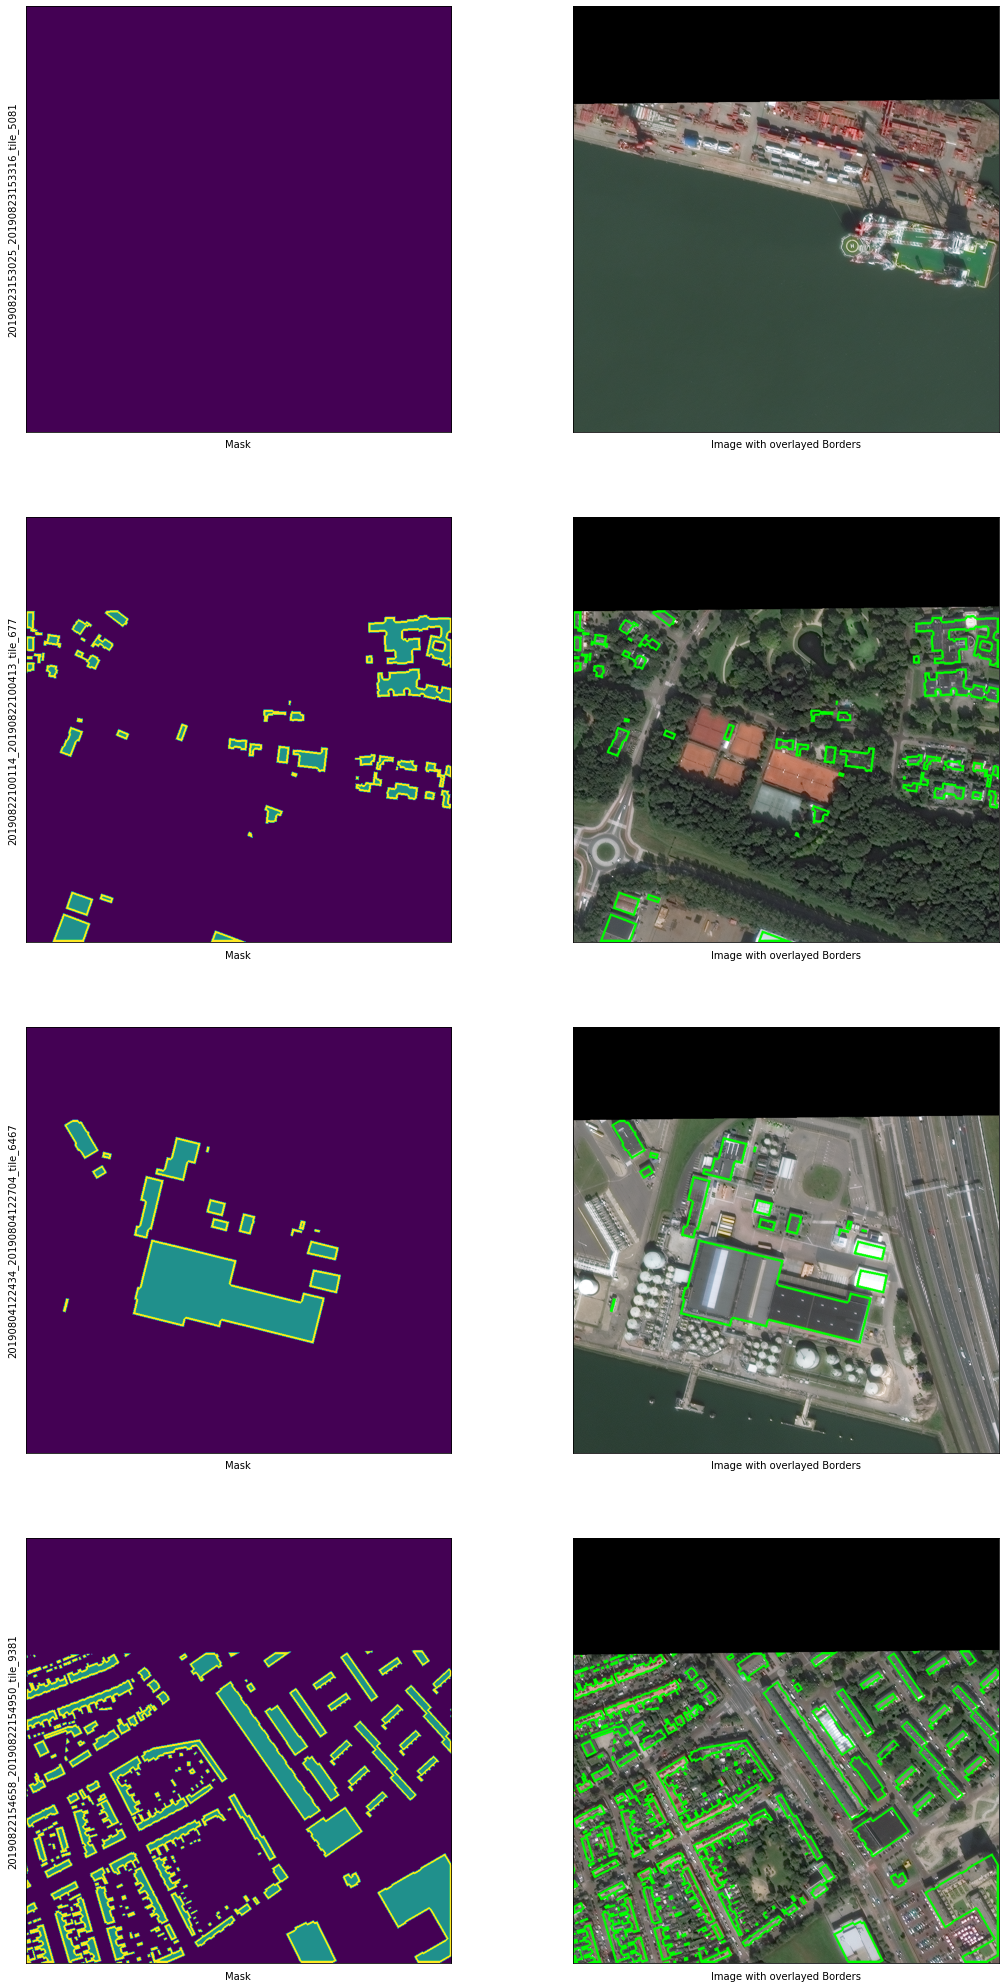

In [6]:
n = 4
summary = load_summary()
list_ds = tf.data.Dataset.list_files('./datasets/train/AOI_11_Rotterdam/PS-RGB/*')

fig, axs = plt.subplots(n, 2, figsize=(9 * 2, 9*n))

for i, e in enumerate(list_ds.take(n)):
    id = e.numpy()[75:-4].decode("utf-8") 
    mask = mask_from_id(id, summary)
    axs[i, 0].imshow(mask)
    axs[i, 0].yaxis.set_ticks([])
    axs[i, 0].xaxis.set_ticks([])
    axs[i, 0].set_ylabel(id)
    axs[i, 0].set_xlabel('Mask')
    # overlay
    img = Image.open(e.numpy().decode("utf-8"))
    img1 = np.array(img)
    img1[mask == 2] = [0, 255, 0]
    axs[i, 1].imshow(img1)
    axs[i, 1].yaxis.set_ticks([])
    axs[i, 1].xaxis.set_ticks([])
    axs[i, 1].set_xlabel('Image with overlayed Borders')


## Unet Testing

In [7]:
from models.test_net import build_model, finalize_model
unet = build_model(nx=256, ny=256, channels=3, num_classes=1, layer_depth=5)
finalize_model(unet)

In [8]:
unet.fit(dataset, epochs=1)

2022-05-15 19:52:52.301964: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


    425/Unknown - 1286s 3s/step - loss: 0.0000e+00 - categorical_crossentropy: 0.0000e+00 - categorical_accuracy: 1.0000 - mean_iou: 0.0913 - dice_coefficient: 0.1550 - auc: 0.5000

2022-05-15 20:14:18.708586: W tensorflow/core/framework/op_kernel.cc:1733] INVALID_ARGUMENT: TypeError: list indices must be integers or slices, not list
Traceback (most recent call last):

  File "/Users/lld/miniforge3/envs/deep_cv/lib/python3.9/site-packages/tensorflow/python/ops/script_ops.py", line 275, in __call__
    ret = func(*args)

  File "/Users/lld/miniforge3/envs/deep_cv/lib/python3.9/site-packages/tensorflow/python/autograph/impl/api.py", line 649, in wrapper
    return func(*args, **kwargs)

  File "/Users/lld/miniforge3/envs/deep_cv/lib/python3.9/site-packages/tensorflow/python/data/ops/dataset_ops.py", line 992, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "/Users/lld/Documents/SoSe 2022/Projects in deep computer vision/deep_cv/dataset_generator.py", line 70, in __call__
    self.on_epoch_end()

  File "/Users/lld/Documents/SoSe 2022/Projects in deep computer vision/deep_cv/dataset_generator.py", line 76, in on_epoch_end
   

InvalidArgumentError:  TypeError: list indices must be integers or slices, not list
Traceback (most recent call last):

  File "/Users/lld/miniforge3/envs/deep_cv/lib/python3.9/site-packages/tensorflow/python/ops/script_ops.py", line 275, in __call__
    ret = func(*args)

  File "/Users/lld/miniforge3/envs/deep_cv/lib/python3.9/site-packages/tensorflow/python/autograph/impl/api.py", line 649, in wrapper
    return func(*args, **kwargs)

  File "/Users/lld/miniforge3/envs/deep_cv/lib/python3.9/site-packages/tensorflow/python/data/ops/dataset_ops.py", line 992, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "/Users/lld/Documents/SoSe 2022/Projects in deep computer vision/deep_cv/dataset_generator.py", line 70, in __call__
    self.on_epoch_end()

  File "/Users/lld/Documents/SoSe 2022/Projects in deep computer vision/deep_cv/dataset_generator.py", line 76, in on_epoch_end
    self.tile_ids = self.tile_ids[reidx]

TypeError: list indices must be integers or slices, not list


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_4503]

In [ ]:
for image, label in dataset.take(5):
    pred = unet(image)
    print(tf.shape(image), tf.shape(label), tf.shape(pred))
    show(image[0], pred[0])